# ECE 657A - Assignment 2 
**Date Submitted:** Mar 09, 2022

##### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import random
from pprint import pprint
from functools import reduce
from scipy import stats
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report,make_scorer, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,GridSearchCV,cross_validate
from sklearn.naive_bayes import MultinomialNB,ComplementNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

## Wine Dataset

### Preprocessing

#### Loading Data

In [2]:
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]
#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

wine['color'] = wine['color'].astype('category')
wine['quality'] = wine['quality'].astype('category')

#### Normalization and Scaling

In [3]:
#Z-Score Normalization
wine_z = wine.copy()
wine_z = wine_z.drop(columns = ['color' , 'quality'])
wine_znormalized = wine_z.apply(stats.zscore)
wine_znormalized['quality'] = wine['quality']
wine_znormalized['color'] = wine['color']

target_z = wine_znormalized['quality']
data_z = wine_znormalized.drop(columns = 'quality')

X_train_z, X_test_z, Y_train_z, Y_test_z = train_test_split(data_z, target_z, test_size=0.2 , random_state=27)

In [4]:
#MinMAx Scaling
wine_s = wine.copy()
wine_s = wine_s.drop(columns = ['color' , 'quality'])
wine_minmax = (wine_s - wine_s.min()) / ( wine_s.max() - wine_s.min())
wine_minmax['quality'] = wine['quality']
wine_minmax['color'] = wine['color']

wine_min_max = wine_minmax
target = wine_min_max['quality']
data = wine_min_max.drop(columns = 'quality')
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2 , random_state=27)

#### Best formulated KNN from Assignment-1

In [5]:
knn = KNeighborsClassifier(n_neighbors=23 , metric = 'manhattan' , weights = "distance")
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

knn_train_acc = knn.score(X_train, Y_train)
print("Training Score: ", knn_train_acc)
knn_test_acc = knn.score(X_test, Y_test)
print("Testing Score: ", knn_test_acc)

Training Score:  1.0
Testing Score:  0.68


### Representation Learning

#### Indepepndent and dependent variable

In [6]:
#Scaled 'data' and 'target'
x=data
y=target
n_components=2
target_names = np.sort(y.unique())

#### PCA

PCA Model - Explained Variance of each component
   Explained Variance Ratio
0                  0.692196
1                  0.118142


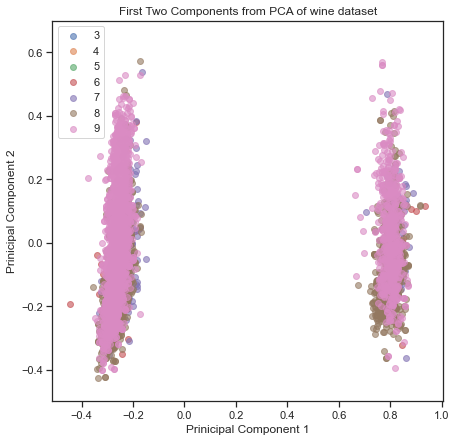

In [7]:
print("PCA Model - Explained Variance of each component")
pca = PCA(n_components=n_components)
X_r = pca.fit(x).transform(x)
exp_var_ratio_df = pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance Ratio'])
print(exp_var_ratio_df)

plt.figure(figsize=(7,7))
#colors = plt.cm.get_cmap("twilight")

for i, target_name in enumerate(target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], alpha=0.6, lw=1, label=target_name,cmap="twilight"
    )
plt.ylim(-0.5,0.7)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("Prinicipal Component 1")
plt.ylabel("Prinicipal Component 2")
plt.title("First Two Components from PCA of wine dataset")
#plt.set_cmap("hsv")

plt.show()

#### LDA

LDA Model - Explained Variance of each component
   Explained Variance Ratio
0                  0.861621
1                  0.088287


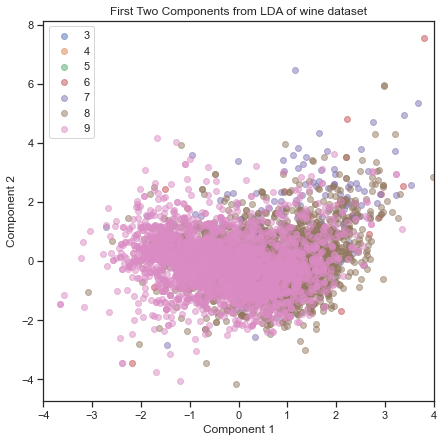

In [8]:
print("LDA Model - Explained Variance of each component")
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_r2 = lda.fit(x, y).transform(x)
exp_var_ratio_df = pd.DataFrame(lda.explained_variance_ratio_, columns=['Explained Variance Ratio'])
print(exp_var_ratio_df)

plt.figure(figsize=(7,7))
#colors = plt.cm.get_cmap("twilight")
for i, target_name in enumerate(target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.5, lw=1, label=target_name, cmap="twilight"
    )
plt.xlim(-4,4)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("First Two Components from LDA of wine dataset")
#plt.set_cmap("twilight")

plt.show()

#### T-SNE

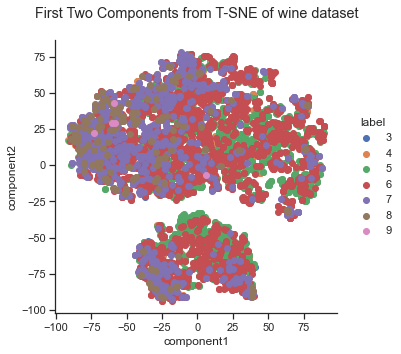

In [9]:
tsne = TSNE(n_components=n_components)
X_r3 = tsne.fit_transform(x)
tsne_data = np.vstack((X_r3.T,target)).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ['component1', 'component2','label'] )
#print(tsne_df.head())
tsne_df['label'] = tsne_df['label'].astype('int')
tsne_df['label'] = tsne_df['label'].astype('category')
g = sns.FacetGrid(tsne_df, hue='label', height=5).map(plt.scatter, 'component1','component2')
g.add_legend()
g.fig.suptitle("First Two Components from T-SNE of wine dataset")
g.tight_layout()

#### Comments

- PCA:Seperation on X-axis(PC1) is more significant and two clusters are formed, spread among each cluster along X-axis is less than Y-axis (color is categorical variable and could be the reason why two different clusters are formed), we have not removed outliers and hence does not perform well.
- LDA: Same class labels are clustered together and is able to better classify between different classes (number of datapoints in various classes are highly different)
- t-SNE: used default settings, non-linear function, clusters similar classes as distance between them are less in both the clusters

#### Scree Plot (PCA)

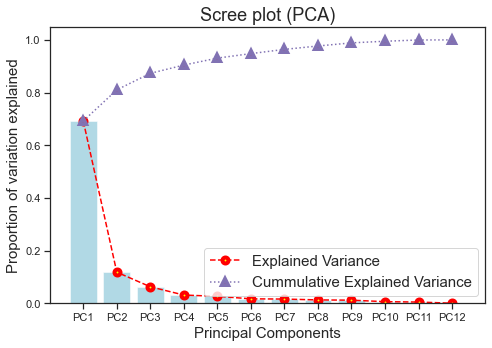

In [10]:
pca = PCA(n_components=None)
X_r = pca.fit(x).transform(x)
explained_variance_pca = pca.explained_variance_ratio_
fig = plt.figure(figsize=(7,5))
tick_label = ['PC' + str(i) for i in range(1,len(explained_variance_pca)+1)]
plt.bar(range(len(explained_variance_pca)), explained_variance_pca, color = 'c',alpha=0.5, align='center',tick_label=tick_label)
plt.plot(range(len(explained_variance_pca)), explained_variance_pca, color = 'red',marker ='o',mew =4,mfc='yellow',ls ='--' ,linewidth=1.5,label='Explained Variance')
plt.plot(range(len(explained_variance_pca)), explained_variance_pca.cumsum(), color = 'm',marker ='^',mew =4,mfc='red',ls =':' ,linewidth=1.5,label='Cummulative Explained Variance')
plt.ylabel('Proportion of variation explained',fontsize = 15)
plt.xlabel('Principal Components',fontsize = 15)
plt.title('Scree plot (PCA)',fontsize = 18)
plt.legend(loc='best',fontsize = 15)
#plt.axis("off")
plt.tight_layout()
plt.show()

#### Reduced Dimensionality

##### PCA

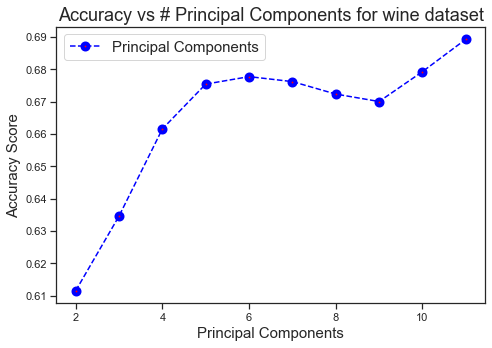

The maximum accuracy 0.6892307692307692 happens to be when number of Principal Components is : 11


In [11]:
knn = KNeighborsClassifier(n_neighbors=23 , metric = 'manhattan' , weights = "distance")
D = data.shape[1]
#print(D)
acc_list =[]

for i in range(2,D):
    pca = PCA(n_components=i)
    X_train_r = pca.fit(X_train).transform(X_train)
    X_test_r = pca.transform(X_test)
    knn.fit(X_train_r, Y_train)
    y_pred = knn.predict(X_test_r)
    acc_list.append(metrics.accuracy_score(Y_test,y_pred))

fig = plt.figure(figsize=(7,5))
plt.plot(range(2,D),acc_list, color = 'blue',marker ='o',mew =4,mfc='red',ls ='--' ,linewidth=1.5,label='Principal Components')
plt.ylabel('Accuracy Score',fontsize = 15)
plt.xlabel('Principal Components',fontsize = 15)
plt.title('Accuracy vs # Principal Components for wine dataset',fontsize = 18)
plt.legend(loc='best',fontsize = 15)
plt.tight_layout()
plt.show()

print("The maximum accuracy {} happens to be when number of Principal Components is : {}".format(max(acc_list),acc_list.index(max(acc_list))+2))

##### LDA

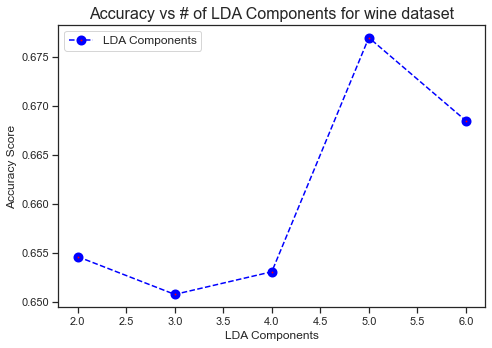

The maximum accuracy 0.676923076923077 happens to be when number of LDA Components is : 5


In [12]:
knn = KNeighborsClassifier(n_neighbors=23 , metric = 'manhattan' , weights = "distance")
#LDA is constrained by the number of components it can use , given by : min(n_classes-1, len(features))
D = min(data.shape[1],len(target_names))
acc_list =[]

for i in range(2,D):
    lda = LinearDiscriminantAnalysis(n_components=i)
    X_train_r = lda.fit(X_train,Y_train).transform(X_train)
    X_test_r = lda.transform(X_test)
    knn.fit(X_train_r, Y_train)
    y_pred = knn.predict(X_test_r)
    acc_list.append(metrics.accuracy_score(Y_test,y_pred))

fig = plt.figure(figsize=(7,5))
plt.plot(range(2,D),acc_list, color = 'blue',marker ='o',mew =4,mfc='red',ls ='--' ,linewidth=1.5,label='LDA Components')
plt.ylabel('Accuracy Score',fontsize = 12)
plt.xlabel('LDA Components',fontsize = 12)
plt.title('Accuracy vs # of LDA Components for wine dataset',fontsize = 16)
plt.legend(loc='best',fontsize = 12)
plt.tight_layout()
plt.show()

print("The maximum accuracy {} happens to be when number of LDA Components is : {}".format(max(acc_list),acc_list.index(max(acc_list))+2))

#### Comments

- Have used 5 principal components in subsequent parts as there is not a significant difference when included more components. Also, 11 components is the original dimension of data and hence would be better representation but there is no significant loss of accuracy by including 5 components.
- LDA gives better accuracy with 5 components.
- Accuracy with reduced dimensions is comparable with accuracy from Assignment-1 (0.68). PCA performs slightly better with 0.69 accuracy. The major observation is that with reduced dimensions accuracy is comparable with the original datset(with all features) hence PCA an dLDA are able to capture most information in lesser components.

#### Versions of dataset (raw/pca/lda)

In [7]:
wine_raw = wine.copy()
wine_normalized_raw = wine_znormalized.copy()
wine_minmax_normalized = wine_minmax.copy()

pca = PCA(n_components=5)
X_r = pca.fit(x).transform(x)
pca_data = np.vstack((X_r.T,target)).T
wine_pca = pd.DataFrame(data = pca_data, columns = ['component1','component2','component3', 'component4','component5','label'] )
wine_pca_temp = wine_pca.copy()
wine_pca_temp_2 = wine_pca_temp.drop(columns = ['label'])
wine_pca = (wine_pca_temp_2 - wine_pca_temp_2.min(axis=0)) / ( wine_pca_temp_2.max(axis=0) - wine_pca_temp_2.min(axis=0))
wine_pca['label']=wine_pca_temp['label']
wine_pca['label'] = wine_pca['label'].astype('int')
wine_pca['label'] = wine_pca['label'].astype('category')
#print(wine_pca.head())

lda = LinearDiscriminantAnalysis(n_components=5)
X_r2 = lda.fit(x, y).transform(x)
lda_data = np.vstack((X_r2.T,target)).T
wine_lda = pd.DataFrame(data = lda_data, columns = ['component1', 'component2','component3','component4','component5','label'] )
wine_lda_temp = wine_lda.copy()
wine_lda_temp_2 = wine_lda_temp.drop(columns = ['label'])
wine_lda = (wine_lda_temp_2 - wine_lda_temp_2.min(axis=0)) / ( wine_lda_temp_2.max(axis=0) - wine_lda_temp_2.min(axis=0))
wine_lda['label']=wine_lda_temp['label']
wine_lda['label'] = wine_lda['label'].astype('int')
wine_lda['label'] = wine_lda['label'].astype('category')
#print(wine_lda.head())

In [14]:
wine_p = wine_pca.copy()
target_pca = wine_p['label']
data_pca = wine_p.drop(columns = 'label')
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(data_pca, target_pca, test_size=0.2 , random_state=27)

wine_l = wine_lda.copy()
target_lda = wine_l['label']
data_lda = wine_l.drop(columns = 'label')
X_train_lda, X_test_lda, Y_train_lda, Y_test_lda = train_test_split(data_lda, target_lda, test_size=0.2 , random_state=27)

### Naive Bayes Classifier

#### 5-Fold CV for Naive Bayes & KNN classifier

In [15]:
kfold = KFold(n_splits=5)
clrs = []

clrs.append(KNeighborsClassifier(n_neighbors=23 , metric = 'manhattan' , weights = "distance"))
clrs.append(GaussianNB())
clrs.append(MultinomialNB())
clrs.append(ComplementNB())

cv_results = []
cv_results_pca = []
cv_results_lda = []

for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, Y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))
    cv_results_pca.append(cross_val_score(clr, X_train_pca, Y_train_pca , scoring = 'accuracy', cv = kfold, n_jobs=-1))
    cv_results_lda.append(cross_val_score(clr, X_train_lda, Y_train_lda , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_means_pca = []
cv_means_lda = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())

for cv_result in cv_results_pca:
    cv_means_pca.append(cv_result.mean())
    
for cv_result in cv_results_lda:
    cv_means_lda.append(cv_result.mean())
    
cv_df = pd.DataFrame({"Mean_Accuracy":cv_means,"Algo":['KNeighborsClassifier','GaussianNB','MultinomialNB','ComplementNB']})
cv_df_pca = pd.DataFrame({"Mean_Accuracy":cv_means_pca,"Algo":['KNeighborsClassifier','GaussianNB','MultinomialNB','ComplementNB']})
cv_df_lda = pd.DataFrame({"Mean_Accuracy":cv_means_lda,"Algo":['KNeighborsClassifier','GaussianNB','MultinomialNB','ComplementNB']})

#print(cv_df)
#print(cv_df_pca)
#print(cv_df_lda)

In [16]:
data_frames = [cv_df, cv_df_pca, cv_df_lda]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Algo'],how='outer'), data_frames)
df_merged.rename(columns={"Mean_Accuracy_x": "wine_raw", "Mean_Accuracy_y": "wine_pca","Mean_Accuracy":"wine_lda"},inplace=True)
df_merged.set_index('Algo',inplace=True)
print(df_merged)

                      wine_raw  wine_pca  wine_lda
Algo                                              
KNeighborsClassifier  0.652869  0.640555  0.646522
GaussianNB            0.359820  0.509904  0.537423
MultinomialNB         0.472769  0.436018  0.436018
ComplementNB          0.396376  0.367124  0.438711


In [17]:
kfold = KFold(n_splits=5)
clrs = []

clrs.append(KNeighborsClassifier(n_neighbors=23 , metric = 'manhattan' , weights = "distance"))
clrs.append(GaussianNB())
clrs.append(MultinomialNB())
clrs.append(ComplementNB())

cv_results = []
cv_results_pca = []
cv_results_lda = []

#scoring = {'accuracy' : make_scorer(accuracy_score), 
#           'precision' : make_scorer(precision_score),
#           'recall' : make_scorer(recall_score), 
#          'f1_score' : make_scorer(f1_score)}

for clr in clrs :
    cv_results.append(cross_val_score(clr, data, target , scoring = 'accuracy', cv = kfold, n_jobs=-1))
    cv_results_pca.append(cross_val_score(clr, data_pca, target_pca , scoring = 'accuracy', cv = kfold, n_jobs=-1))
    cv_results_lda.append(cross_val_score(clr, data_pca, target_pca , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_means_pca = []
cv_means_lda = []

#print(cv_results)
for cv_result in cv_results:
    cv_means.append(cv_result.mean())

for cv_result in cv_results_pca:
    cv_means_pca.append(cv_result.mean())
    
for cv_result in cv_results_lda:
    cv_means_lda.append(cv_result.mean())
    
cv_df = pd.DataFrame({"Mean_Accuracy":cv_means,"Algo":['KNeighborsClassifier','GaussianNB','MultinomialNB','ComplementNB']})
cv_df_pca = pd.DataFrame({"Mean_Accuracy":cv_means_pca,"Algo":['KNeighborsClassifier','GaussianNB','MultinomialNB','ComplementNB']})
cv_df_lda = pd.DataFrame({"Mean_Accuracy":cv_means_lda,"Algo":['KNeighborsClassifier','GaussianNB','MultinomialNB','ComplementNB']})

#print(cv_df)
#print(cv_df_pca)
#print(cv_df_lda)

In [18]:
data_frames = [cv_df, cv_df_pca, cv_df_lda]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Algo'],how='outer'), data_frames)
df_merged.rename(columns={"Mean_Accuracy_x": "wine_raw", "Mean_Accuracy_y": "wine_pca","Mean_Accuracy":"wine_lda"},inplace=True)
df_merged.set_index('Algo',inplace=True)
print(df_merged)

                      wine_raw  wine_pca  wine_lda
Algo                                              
KNeighborsClassifier  0.504236  0.489310  0.489310
GaussianNB            0.309505  0.467139  0.467139
MultinomialNB         0.430356  0.436515  0.436515
ComplementNB          0.396336  0.385406  0.385406


#### Comments

- Complement Naive Bayes does not outperform as expected for the unbalance wine dataset. While training using Complement NB it trains each class with all data, but the sample from that class and because it is a multiclass classsification with higer Prior , the likelihood impact is reduced and overall accuracy is not good.-In case of imbalanced dataset, better measures for performance evaluation are Precision,Recall or F-Score.

### Decision Trees Classifier

#### 5-Fold CV and hyperparameter tuning

In [19]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)
#cm=confusion_matrix(Y_test, Y_pred)
#print(confusion_matrix(Y_test, Y_pred))
#print(classification_report(Y_test, Y_pred))
print("Accuracy Score for Decision Tree classifier without hyper parameter tuning is: ",accuracy_score(Y_test, Y_pred))
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
#disp.plot()

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2,25,1),
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)
dtc = grid_search.best_estimator_
Y_pred = dtc.predict(X_test) 
print("Accuracy Score is :",accuracy_score(Y_test, Y_pred))
# best parameters and best score
print("Best Parameters are : ",grid_search.best_params_)
print("Best Score is : ",grid_search.best_score_)
#dt_raw_acc = accuracy_score(Y_test, Y_pred)
dt_raw_set=grid_search.best_params_

grid_search.fit(X_train_pca, Y_train_pca)
dtc = grid_search.best_estimator_
Y_pred_pca = dtc.predict(X_test_pca) 
print("Accuracy Score using PCA is :",accuracy_score(Y_test_pca, Y_pred_pca))
# best parameters and best score
print("Best Parameters using PCA are : ",grid_search.best_params_)
print("Best Score using PCA is : ",grid_search.best_score_)
dt_pca_set=grid_search.best_params_

grid_search.fit(X_train_lda, Y_train_lda)
dtc = grid_search.best_estimator_
Y_pred_lda = dtc.predict(X_test_lda) 
print("Accuracy Score using LDA is :",accuracy_score(Y_test_lda, Y_pred_lda))
# best parameters and best score
print("Best Parameters using LDA are : ",grid_search.best_params_)
print("Best Score using LDA is : ",grid_search.best_score_)
dt_lda_set=grid_search.best_params_

Accuracy Score for Decision Tree classifier without hyper parameter tuning is:  0.6115384615384616
Fitting 5 folds for each of 2944 candidates, totalling 14720 fits
Accuracy Score is : 0.5792307692307692
Best Parameters are :  {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 2, 'min_samples_split': 6}
Best Score is :  0.5639766417413193
Fitting 5 folds for each of 2944 candidates, totalling 14720 fits
Accuracy Score using PCA is : 0.5584615384615385
Best Parameters using PCA are :  {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score using PCA is :  0.5474289257422077
Fitting 5 folds for each of 2944 candidates, totalling 14720 fits
Accuracy Score using LDA is : 0.5423076923076923
Best Parameters using LDA are :  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6}
Best Score using LDA is :  0.5505084400681128


In [20]:
dt_raw_acc = accuracy_score(Y_test, Y_pred)
dt_pca_acc = accuracy_score(Y_test_pca, Y_pred_pca)
dt_lda_acc = accuracy_score(Y_test_lda, Y_pred_lda)
#print(dt_raw_acc,dt_pca_acc,dt_lda_acc)

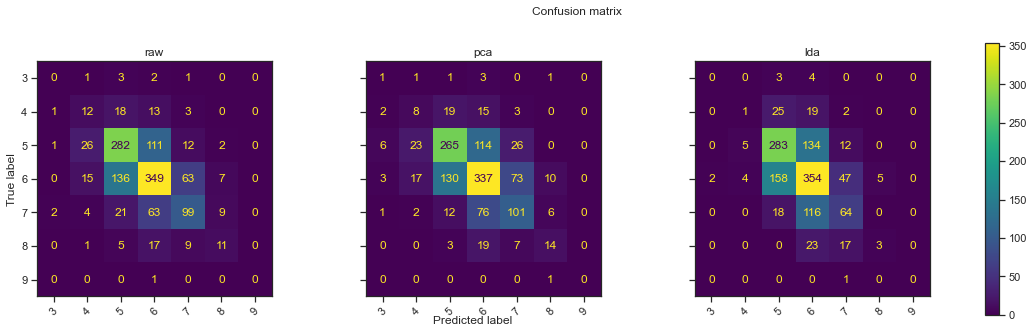

In [21]:
cm=confusion_matrix(Y_test, Y_pred)
cm_pca=confusion_matrix(Y_test_pca, Y_pred_pca)
cm_lda=confusion_matrix(Y_test_lda, Y_pred_lda)
cm_dict = {
    "raw": cm,
    "pca": cm_pca,
    "lda": cm_lda
}

f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')
for i,(c,cm) in enumerate(cm_dict.items()):
    #print(i,cm)
    disp = ConfusionMatrixDisplay(cm,display_labels=dtc.classes_)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(c)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)

f.suptitle('Confusion matrix', fontsize=12)
f.colorbar(disp.im_, ax=axes)
plt.show()


#### Accuracy vs Max_depth

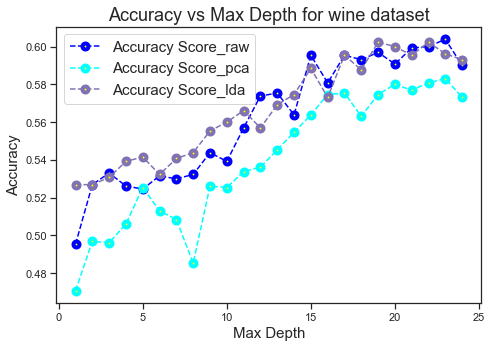

In [22]:
def plot_acc_vs_depth(dataset):
    max_depth_range = list(range(1, 25))
    acc_list = []
    acc_list_pca = []
    acc_list_lda = []
    for depth in max_depth_range:
        dtc_w = DecisionTreeClassifier(max_depth = depth)
        if dataset[0] == 'raw':
            dtc_w.fit(X_train, Y_train)
            score = dtc_w.score(X_test, Y_test)
            acc_list.append(score)
        if dataset[1] == 'pca':
            dtc_w.fit(X_train_pca, Y_train_pca)
            score = dtc_w.score(X_test_pca, Y_test_pca)
            acc_list_pca.append(score)
        if dataset[2] == 'lda':
            dtc_w.fit(X_train_lda, Y_train_lda)
            score =dtc_w.score(X_test_lda, Y_test_lda)
            acc_list_lda.append(score)

    return(acc_list,acc_list_pca,acc_list_lda)
  
acc_list,acc_list_pca,acc_list_lda = plot_acc_vs_depth(['raw','pca','lda'])
fig = plt.figure(figsize=(7,5))
plt.plot(range(1,25),acc_list, color = 'blue',marker ='o',mew =4,mfc='yellow',ls ='--' ,linewidth=1.5,label='Accuracy Score_raw')
plt.plot(range(1,25),acc_list_pca, color = 'cyan',marker ='o',mew =4,mfc='yellow',ls ='--' ,linewidth=1.5,label='Accuracy Score_pca')
plt.plot(range(1,25),acc_list_lda, color = 'm',marker ='o',mew =4,mfc='yellow',ls ='--' ,linewidth=1.5,label='Accuracy Score_lda')
plt.ylabel('Accuracy',fontsize = 15)
plt.xlabel('Max Depth',fontsize = 15)
plt.title('Accuracy vs Max Depth for wine dataset',fontsize = 18)
plt.legend(loc='best',fontsize = 15)
plt.tight_layout()
plt.show()

#### Splitting rules used for the trees

In [23]:
dtc_g = DecisionTreeClassifier(criterion= 'entropy', max_depth=18, min_samples_leaf= 2, min_samples_split=5)
dtc_g.fit(X_train,Y_train)
fn=X_train.columns
cn = wine_raw.quality.unique().astype(str)
dot_data = tree.export_graphviz(dtc_g, filled=True,feature_names=fn,class_names=cn ,rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

#### Text split rules

In [8]:
from sklearn.tree import export_text
dtc_g = DecisionTreeClassifier(criterion= 'entropy', max_depth=18, min_samples_leaf= 2, min_samples_split=5)
dt_rules = dtc_g.fit(X_train,Y_train)
fn_t=X_train.columns
#print(type(fn_t.tolist()))
tree_rules = export_text(dt_rules,feature_names = fn_t.tolist())
#print(tree_rules)

###### Splitting rules used for the trees but fitted on page

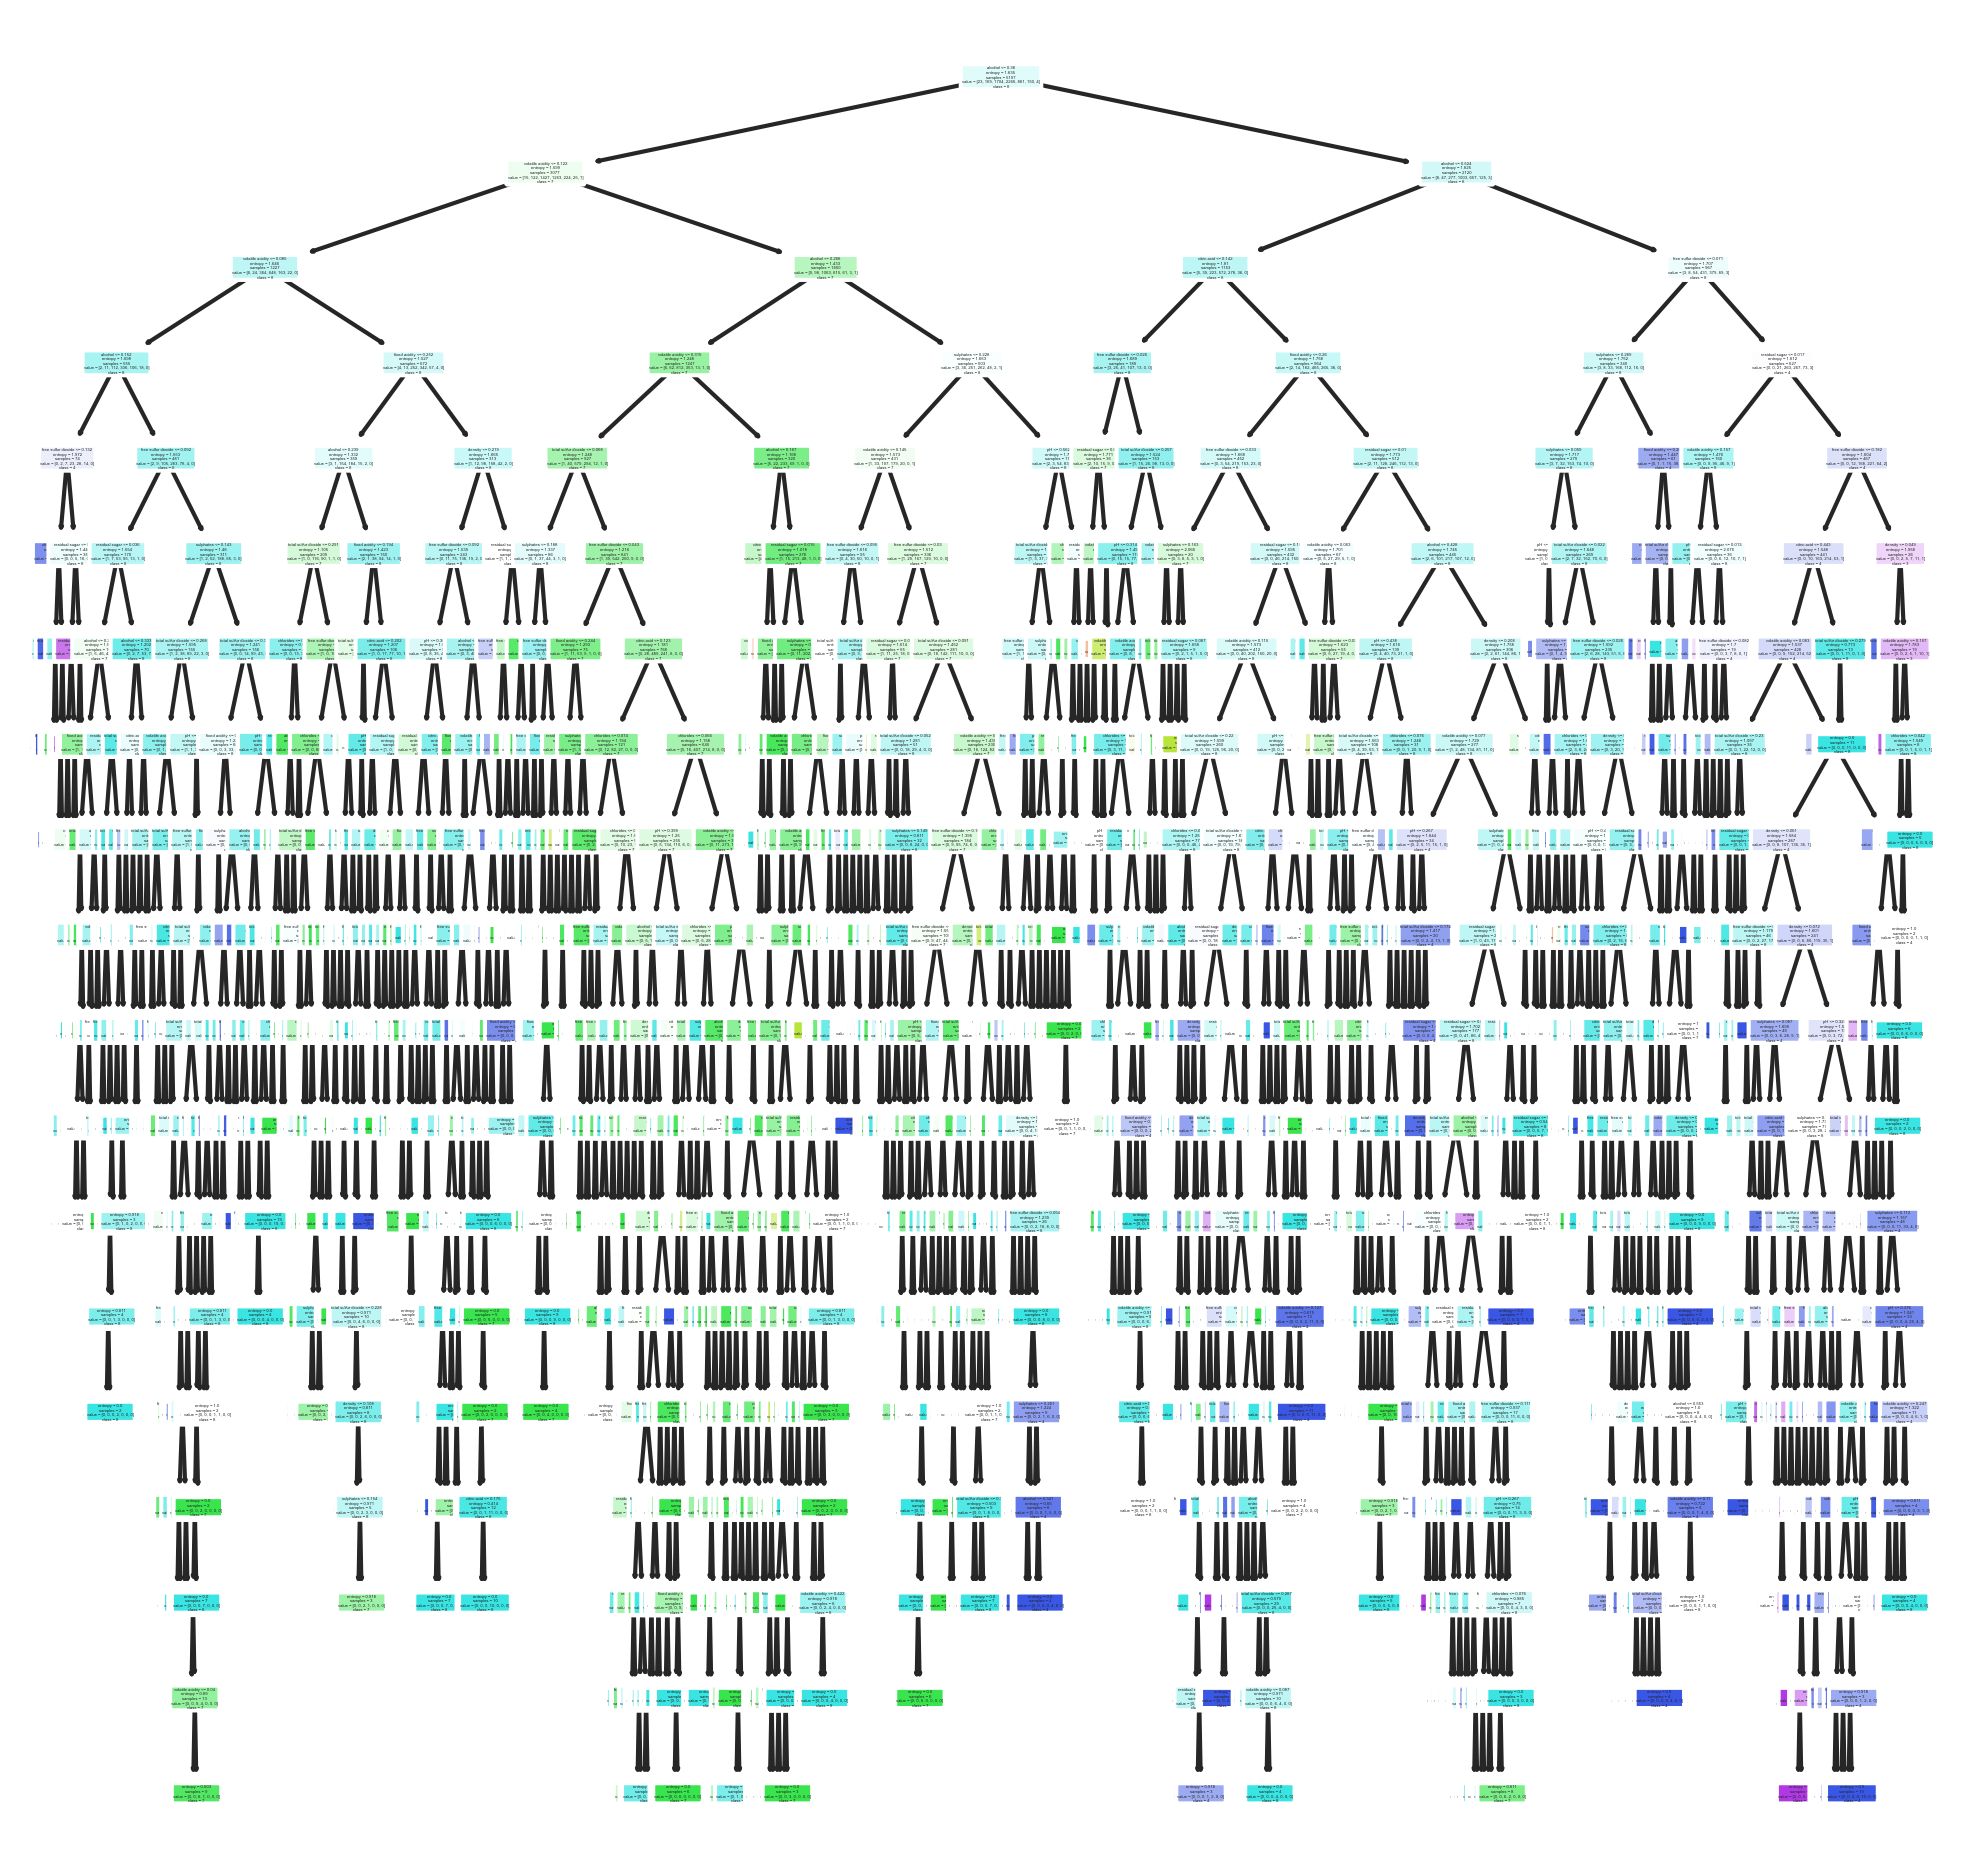

In [10]:
dtc_g = DecisionTreeClassifier(criterion= 'entropy', max_depth=18, min_samples_leaf= 2, min_samples_split=5)
dtc_g.fit(X_train,Y_train)
fn=X_train.columns
cn = wine_raw.quality.unique().astype(str)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
tree.plot_tree(dtc_g, filled=True,feature_names=fn,class_names=cn ,rounded=True)
fig.savefig('dtc_tree_plot_4.png')

#### Comments

- Alcohol and volatile accidity are important splitting parametrs. Optimal Max_depth is larger than the original features, clearly indicating that there are no clear patterns while splitting. Categorical and quantitave, both data are used for splitting rules.

### Random Forest Classifier

#### 5-Fold CV and hyperpararmeter tuning

In [25]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
cm=confusion_matrix(Y_test, Y_pred)
#print(confusion_matrix(Y_test, Y_pred))
#print(classification_report(Y_test, Y_pred))
print("Accuracy Score for Forest classifier without hyper parameter tuning is: ",accuracy_score(Y_test, Y_pred))
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
#disp.plot()

grid_params = {
    'n_estimators': [2,5,200, 500],
    'criterion' : ['entropy'],
    'max_depth' : range(2,25,1),
    #'max_features': range(3,10,1),
    #'min_samples_split' : range(2, 10, 1),
    #'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(rfc, grid_params, cv = 5, n_jobs = -1, verbose = True)
#print(grid_search.get_params().keys())
grid_search.fit(X_train, Y_train)
rfc = grid_search.best_estimator_
Y_pred = rfc.predict(X_test) 
print("Accuracy Score is :",accuracy_score(Y_test, Y_pred))
rf_raw_acc=accuracy_score(Y_test, Y_pred)
# best parameters and best score
print("Best Parameters are : ",grid_search.best_params_)
rf_raw_set=grid_search.best_params_
#print("Best Score is : ",grid_search.best_score_)
ac_df=pd.DataFrame(grid_search.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df["accuracy"]=grid_search.cv_results_['mean_test_score']

grid_search.fit(X_train_pca, Y_train_pca)
rfc_pca = grid_search.best_estimator_
Y_pred_pca = rfc_pca.predict(X_test_pca) 
print("Accuracy Score using PCA is :",accuracy_score(Y_test_pca, Y_pred_pca))
rf_pca_acc=accuracy_score(Y_test_pca, Y_pred_pca)
# best parameters and best score
print("Best Parameters using PCA are : ",grid_search.best_params_)
rf_pca_set=grid_search.best_params_
#print("Best Score using PCA is : ",grid_search.best_score_)
ac_df_pca=pd.DataFrame(grid_search.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df_pca["accuracy"]=grid_search.cv_results_['mean_test_score']

grid_search.fit(X_train_lda, Y_train_lda)
rfc_lda = grid_search.best_estimator_
Y_pred_lda = rfc_lda.predict(X_test_lda) 
print("Accuracy Score using LDA is :",accuracy_score(Y_test_lda, Y_pred_lda))
rf_lda_acc=accuracy_score(Y_test_lda, Y_pred_lda)
# best parameters and best score
print("Best Parameters using LDA are : ",grid_search.best_params_)
#print("Best Score using LDA is : ",grid_search.best_score_)
rf_lda_set=grid_search.best_params_
ac_df_lda=pd.DataFrame(grid_search.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df_lda["accuracy"]=grid_search.cv_results_['mean_test_score']

Accuracy Score for Forest classifier without hyper parameter tuning is:  0.6915384615384615
Fitting 5 folds for each of 92 candidates, totalling 460 fits
Accuracy Score is : 0.6953846153846154
Best Parameters are :  {'criterion': 'entropy', 'max_depth': 18, 'n_estimators': 500}
Fitting 5 folds for each of 92 candidates, totalling 460 fits
Accuracy Score using PCA is : 0.6607692307692308
Best Parameters using PCA are :  {'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 200}
Fitting 5 folds for each of 92 candidates, totalling 460 fits
Accuracy Score using LDA is : 0.6784615384615384
Best Parameters using LDA are :  {'criterion': 'entropy', 'max_depth': 17, 'n_estimators': 500}


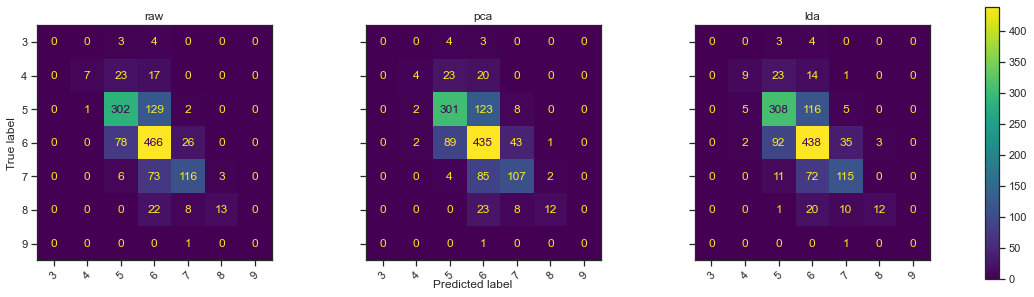

In [26]:
cm=confusion_matrix(Y_test, Y_pred)
cm_pca=confusion_matrix(Y_test_pca, Y_pred_pca)
cm_lda=confusion_matrix(Y_test_lda, Y_pred_lda)
cm_dict = {
    "raw": cm,
    "pca": cm_pca,
    "lda": cm_lda
}

f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')
for i,(c,cm) in enumerate(cm_dict.items()):
    #print(i,cm)
    disp = ConfusionMatrixDisplay(cm,display_labels=dtc.classes_)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(c)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()


#### Heatmap of max_depth vs n_estimators

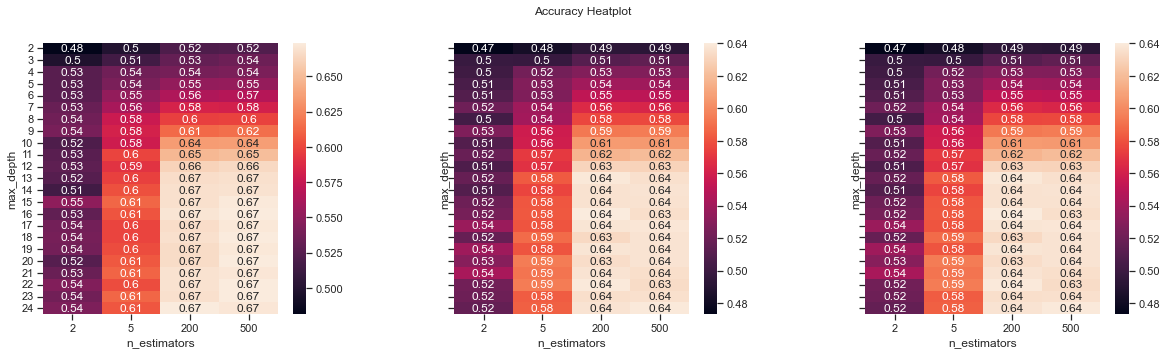

In [27]:
#Pivoting the dataframe for plotting heat map
ac_df=ac_df.pivot(index='max_depth',columns='n_estimators',values='accuracy')
ac_df_pca=ac_df_pca.pivot(index='max_depth',columns='n_estimators',values='accuracy')
ac_df_lda=ac_df_lda.pivot(index='max_depth',columns='n_estimators',values='accuracy')
#Plotting the graph
fig, ax =plt.subplots(1,3,figsize=(20, 5), sharey='row')

sns.heatmap(ac_df,annot=True, ax=ax[0])
sns.heatmap(ac_df_pca,annot=True ,ax=ax[1])
sns.heatmap(ac_df_pca,annot=True ,ax=ax[2])

plt.subplots_adjust(wspace=0.40, hspace=0.1)
fig.suptitle('Accuracy Heatplot', fontsize=12)
plt.show()

### Gradient Boosting Classifier

#### 5-Fold CV and hyperparameter tuning

In [28]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
Y_pred = gbc.predict(X_test)
cm=confusion_matrix(Y_test, Y_pred)
#print(confusion_matrix(Y_test, Y_pred))
#print(classification_report(Y_test, Y_pred))
print("Accuracy Score for Gradient Boosting classifier without hyper parameter tuning is: ",accuracy_score(Y_test, Y_pred))
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
#disp.plot()

grid_params = {
    'n_estimators': [2,120,200,500,800],
    'learning_rate' : [0.01, 0.1,1],
    #'criterion' : [None,'mse','mae'],
    #'max_depth' : range(2,22,2),
    #'max_features': range(3,10,1),
    #'min_samples_split' : range(2, 10, 1),
    #'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(gbc, grid_params, cv = 5, n_jobs = -1, verbose = True)
#print(grid_search.get_params().keys())
grid_search.fit(X_train, Y_train)
gbc = grid_search.best_estimator_
Y_pred = gbc.predict(X_test) 
print("Accuracy Score is :",accuracy_score(Y_test, Y_pred))
gbc_acc=accuracy_score(Y_test, Y_pred)
# best parameters and best score
print("Best Parameters are : ",grid_search.best_params_)
gbc_set=grid_search.best_params_
#print("Best Score using PCA is : ",grid_search.best_score_)
gbc_ac_df=pd.DataFrame(grid_search.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
gbc_ac_df["accuracy"]=grid_search.cv_results_['mean_test_score']



grid_search.fit(X_train_pca, Y_train_pca)
gbc = grid_search.best_estimator_
Y_pred_pca = gbc.predict(X_test_pca) 
print("Accuracy Score is :",accuracy_score(Y_test_pca, Y_pred_pca))
gbc_pca_acc=accuracy_score(Y_test_pca, Y_pred_pca)
# best parameters and best score
print("Best Parameters are : ",grid_search.best_params_)
gbc_pca_set=grid_search.best_params_
#print("Best Score using PCA is : ",grid_search.best_score_)
gbc_ac_df_pca=pd.DataFrame(grid_search.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
gbc_ac_df_pca["accuracy"]=grid_search.cv_results_['mean_test_score']


grid_search.fit(X_train_lda, Y_train_lda)
gbc = grid_search.best_estimator_
Y_pred_lda = gbc.predict(X_test_lda) 
print("Accuracy Score is :",accuracy_score(Y_test_lda, Y_pred_lda))
gbc_lda_acc=accuracy_score(Y_test_lda, Y_pred_lda)
# best parameters and best score
print("Best Parameters are : ",grid_search.best_params_)
gbc_lda_set=grid_search.best_params_
#print("Best Score using PCA is : ",grid_search.best_score_)
gbc_ac_df_lda=pd.DataFrame(grid_search.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
gbc_ac_df_lda["accuracy"]=grid_search.cv_results_['mean_test_score']

Accuracy Score for Gradient Boosting classifier without hyper parameter tuning is:  0.6007692307692307
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Accuracy Score is : 0.6346153846153846
Best Parameters are :  {'learning_rate': 0.1, 'n_estimators': 800}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Accuracy Score is : 0.6192307692307693
Best Parameters are :  {'learning_rate': 0.1, 'n_estimators': 800}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Accuracy Score is : 0.6430769230769231
Best Parameters are :  {'learning_rate': 0.1, 'n_estimators': 800}


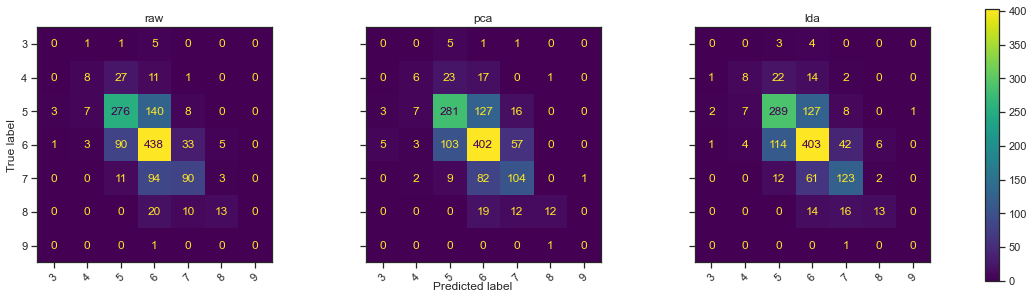

In [29]:
cm=confusion_matrix(Y_test, Y_pred)
cm_pca=confusion_matrix(Y_test_pca, Y_pred_pca)
cm_lda=confusion_matrix(Y_test_lda, Y_pred_lda)
cm_dict = {
    "raw": cm,
    "pca": cm_pca,
    "lda": cm_lda
}

f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')
for i,(c,cm) in enumerate(cm_dict.items()):
    #print(i,cm)
    disp = ConfusionMatrixDisplay(cm,display_labels=dtc.classes_)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(c)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()


#### Heatplot of learning_rate and n_estimators

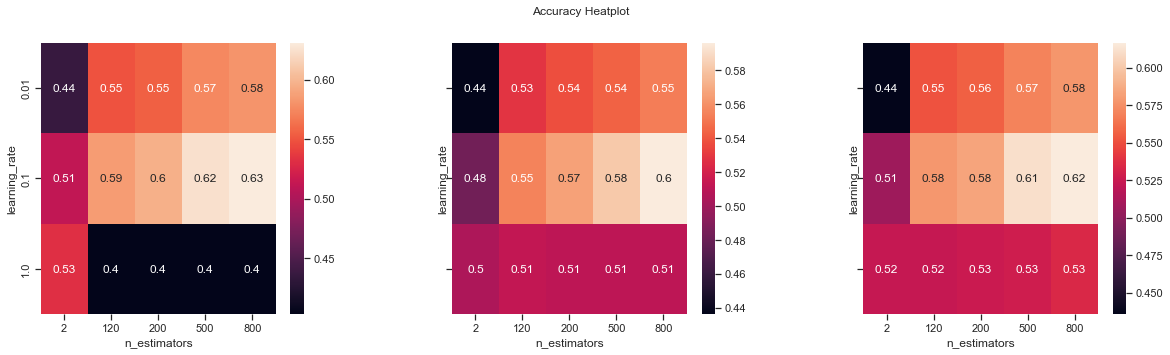

In [30]:
#Pivoting the dataframe for plotting heat map
gbc_ac_df=gbc_ac_df.pivot(index='learning_rate',columns='n_estimators',values='accuracy')
gbc_ac_df_pca=gbc_ac_df_pca.pivot(index='learning_rate',columns='n_estimators',values='accuracy')
gbc_ac_df_lda=gbc_ac_df_lda.pivot(index='learning_rate',columns='n_estimators',values='accuracy')
#Plotting the graph
fig, ax =plt.subplots(1,3,figsize=(20, 5), sharey='row')

sns.heatmap(gbc_ac_df,annot=True, ax=ax[0])
sns.heatmap(gbc_ac_df_pca,annot=True ,ax=ax[1])
sns.heatmap(gbc_ac_df_lda,annot=True ,ax=ax[2])

plt.subplots_adjust(wspace=0.40, hspace=0.1)
fig.suptitle('Accuracy Heatplot', fontsize=12)
plt.show()

### Final Results

In [51]:
dt_dict = {'Algo': ['Decision Tree','Random Forest','Gradient Boosting'], 
           'wine_raw': [dt_raw_acc,rf_raw_acc,gbc_acc], 'wine_pca': [dt_pca_acc,rf_pca_acc,gbc_pca_acc],
           'wine_lda':[dt_lda_acc,rf_lda_acc,gbc_lda_acc]}

df_mid=pd.DataFrame(data=dt_dict,columns=['Algo','wine_raw','wine_pca','wine_lda'])
#display(df_mid)
df_nb=df_merged.reset_index()
final_df = df_nb.append(df_mid, ignore_index=True)
display(final_df)

Algo  wine_raw  wine_pca  wine_lda
0  KNeighborsClassifier  0.504236  0.489310  0.489310
1            GaussianNB  0.309505  0.467139  0.467139
2         MultinomialNB  0.430356  0.436515  0.436515
3          ComplementNB  0.396336  0.385406  0.385406
4         Decision Tree  0.579231  0.558462  0.542308
5         Random Forest  0.695385  0.660769  0.678462
6     Gradient Boosting  0.634615  0.619231  0.643077

In [ ]:
#print(dt_raw_set.keys())
#print(dt_raw_set.values(),dt_pca_set.values(),dt_lda_set.values())
dt_s =[dt_raw_set,dt_pca_set,dt_lda_set]
df_dt_settings = pd.DataFrame(dt_s)
df_dt_settings['Algo']= 'Decision Tree'
df_dt_settings['Data'] = ['raw','pca','lda']
display(df_dt_settings)

In [65]:
rf_s =[rf_raw_set,rf_pca_set,rf_lda_set]
df_rf_settings = pd.DataFrame(rf_s)
df_rf_settings['Algo']= 'Random Forest'
df_rf_settings['Data'] = ['raw','pca','lda']
display(df_rf_settings)

criterion  max_depth  n_estimators           Algo Data
0   entropy         18           500  Random Forest  raw
1   entropy         16           200  Random Forest  pca
2   entropy         17           500  Random Forest  lda

In [66]:
gbc_s =[gbc_set,gbc_pca_set,gbc_lda_set]
df_gbc_settings = pd.DataFrame(gbc_s)
df_gbc_settings['Algo']= 'Gradient Boosting'
df_gbc_settings['Data'] = ['raw','pca','lda']
display(df_gbc_settings)

learning_rate  n_estimators               Algo Data
0            0.1           800  Gradient Boosting  raw
1            0.1           800  Gradient Boosting  pca
2            0.1           800  Gradient Boosting  lda

In [ ]:
knn_setting = ({'n_neighbors':23 , 'metric': 'manhattan' , 'weights': "distance"})
gnb_settings = ("default")
mnb_settings = ("default")
cnb_settings = ("default")
dt_settings = ({'criterion':'Entropy','max_depth':18,'min_samples_leaf':2,'min_samples_split':6})
rf_settings = ({'criterion':'Entropy','max_depth':18,'n_estimators':500})
gb_settings = ({'learning_rate':0.1,'n_estimators':800})

settings_all =[knn_setting,gnb_settings,mnb_settings,cnb_settings,dt_settings,dt_settings,rf_settings,gb_settings]
settings_all
df_final['settings'] =settings_all

In [9]:
display(df_final)

Algo                                           settings  \
0  KNeighborsClassifier  {'n_neighbors': 23, 'metric': 'manhattan', 'we...   
1            GaussianNB                                           default'   
2         MultinomialNB                                           default'   
3          ComplementNB                                           default'   
4         Decision Tree  {'criterion': 'Entropy','max_depth': 18,'min_s...   
5         Random Forest  {'criterion': 'Entropy', 'max_depth': 18, 'n_e...   
6     Gradient Boosting        {'learning_rate': 0.1, 'n_estimators': 800}   

   wine_raw  wine_pca  wine_lda  
0  0.504236  0.489310  0.489310  
1  0.309505  0.467139  0.467139  
2  0.430356  0.436515  0.436515  
3  0.396336  0.385406  0.385406  
4  0.579231  0.558462  0.542308  
5  0.695385  0.660769  0.678462  
6  0.634615  0.619231  0.643077

#### Comments

- Random Forest with following pipeline (raw -> scaling -> Random Forest) performed the best task at  classification although with PCA nd LDA for Random Forest accuracy is comparable.
- For Gradient Boosting and Gaussian Naive bayes , dimensionality reduction did help while for other algorithms the accuracy results were almost comparable to original dataset
- There was not very positive correlation between features and hence PCA,LDA did not dramatically impact the accuracy.
- Since PCA is a linear method, it is not able to capture the non-linear dependencies in data.
- In case of imbalanced dataset, better measures for performance evaluation are Precision,Recall or F-Score.